In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Oculta warnings do notebook
# import warnings
# warnings.filterwarnings('ignore')

# Configurações de visualização
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
dataset_path = 'datasets/'
cand_df = pd.read_csv(f"{dataset_path}consulta_cand_2022_SP.csv", sep=';')
print(cand_df.shape)
cand_df.info()

(3659, 71)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     3659 non-null   object 
 1   HH_GERACAO                     3659 non-null   object 
 2   ANO_ELEICAO                    3659 non-null   int64  
 3   CD_TIPO_ELEICAO                3659 non-null   int64  
 4   NM_TIPO_ELEICAO                3659 non-null   object 
 5   NR_TURNO                       3659 non-null   int64  
 6   CD_ELEICAO                     3659 non-null   int64  
 7   DS_ELEICAO                     3659 non-null   object 
 8   DT_ELEICAO                     3659 non-null   object 
 9   TP_ABRANGENCIA                 3659 non-null   object 
 10  SG_UF                          3659 non-null   object 
 11  SG_UE                          3659 non-null   object 
 12  NM_UE                          3659 n

In [7]:
rs_df = pd.read_csv(f"{dataset_path}rede_social_candidato_2022_SP.csv", sep=';')
print(rs_df.shape)
rs_df.info()

(6735, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DT_GERACAO       6735 non-null   object
 1   HH_GERACAO       6735 non-null   object
 2   AA_ELEICAO       6735 non-null   int64 
 3   SG_UF            6735 non-null   object
 4   CD_TIPO_ELEICAO  6735 non-null   int64 
 5   NM_TIPO_ELEICAO  6735 non-null   object
 6   CD_ELEICAO       6735 non-null   int64 
 7   DS_ELEICAO       6735 non-null   object
 8   SQ_CANDIDATO     6735 non-null   int64 
 9   NR_ORDEM         6735 non-null   int64 
 10  DS_URL           6735 non-null   object
dtypes: int64(5), object(6)
memory usage: 578.9+ KB


In [26]:
rs_df[rs_df.DS_URL.str.contains('twitter', case=False)].shape

(624, 11)

In [27]:
twitter_candidates = rs_df[rs_df.DS_URL.str.contains('twitter', case=False)]

In [33]:
df = pd.merge(cand_df, twitter_candidates[['SQ_CANDIDATO', 'DS_URL']], on="SQ_CANDIDATO", how="left")
df.shape

(3682, 72)

In [96]:
# Filtrando deputados eleitos que possuam perfil no Twitter
elected_values = ['ELEITO POR QP', 'ELEITO POR MÉDIA', 'ELEITO']

fed_df = df.loc[
    (df['DS_CARGO'] == 'DEPUTADO FEDERAL') & 
    (df['DS_SIT_TOT_TURNO'].isin(elected_values)) &
    (df['DS_URL'].notna())
]
print(fed_df.shape)

est_df = df.loc[
    (df['DS_CARGO'] == 'DEPUTADO ESTADUAL') & 
    (df['DS_SIT_TOT_TURNO'].isin(elected_values)) & 
    (df['DS_URL'].notna())
]
print(est_df.shape)

(42, 72)
(50, 72)


In [97]:
# Vamos checar os candidatos duplicados
print('Federais: \n')
print((fed_df.SQ_CANDIDATO.value_counts() > 1).loc[lambda x: x == True].index)

print('Estaduais: \n')
print((est_df.SQ_CANDIDATO.value_counts() > 1).loc[lambda x: x == True].index)

Federais: 

Int64Index([], dtype='int64')
Estaduais: 

Int64Index([250001611799], dtype='int64')


In [98]:
# Vamos checar as contas deste candidato
est_df[est_df.SQ_CANDIDATO == 250001611799]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,NR_FEDERACAO,NM_FEDERACAO,SG_FEDERACAO,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS,DS_URL
885,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001611799,13114,ENIO FRANCISCO TATTO,ENIO TATTO,#NULO#,1075694850,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,FEDERAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,2,Federação Brasil da Esperança - FE BRASIL,PT/PC do B/PV,PT/PC do B/PV,250001681589,FEDERAÇÃO,PT/PC do B/PV,1,BRASILEIRA NATA,RS,-3,FREDERICO WESTPHALEN,20/05/1960,62.00,115832150175,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,"1,270,629.01",2,ELEITO POR QP,S,S,-1,6016936920226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://twitter.com/depeniotatto
886,15/02/2023,18:42:41,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,SP,SP,SÃO PAULO,7,DEPUTADO ESTADUAL,250001611799,13114,ENIO FRANCISCO TATTO,ENIO TATTO,#NULO#,1075694850,NÃO DIVULGÁVEL,12,APTO,2,DEFERIDO,FEDERAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,2,Federação Brasil da Esperança - FE BRASIL,PT/PC do B/PV,PT/PC do B/PV,250001681589,FEDERAÇÃO,PT/PC do B/PV,1,BRASILEIRA NATA,RS,-3,FREDERICO WESTPHALEN,20/05/1960,62.00,115832150175,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,"1,270,629.01",2,ELEITO POR QP,S,S,-1,6016936920226260000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S,https://www.twitter.com/eniotatto13114


In [99]:
# Testando os links, percebe-se que o segundo não existe mais, portanto podemos remover esta linha
est_df = est_df.drop([886])

In [106]:
print('Federais:\n')
print(fed_df.DS_GENERO.value_counts())
print()
print(fed_df.DS_COR_RACA.value_counts())

print()
print('Estaduais:\n')
print(est_df.DS_GENERO.value_counts())
print()
print(est_df.DS_COR_RACA.value_counts())

Federais:

MASCULINO    32
FEMININO     10
Name: DS_GENERO, dtype: int64

BRANCA      36
INDÍGENA     2
PRETA        2
PARDA        2
Name: DS_COR_RACA, dtype: int64

Estaduais:

MASCULINO    33
FEMININO     16
Name: DS_GENERO, dtype: int64

BRANCA    42
PRETA      5
PARDA      2
Name: DS_COR_RACA, dtype: int64


<AxesSubplot: xlabel='DS_COR_RACA', ylabel='Count'>

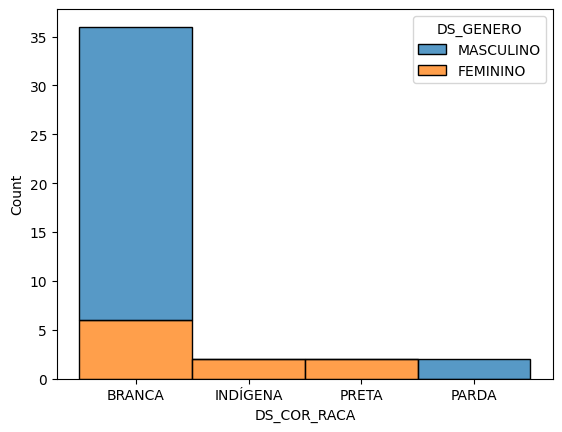

In [101]:
sns.histplot(
    data=fed_df,
    hue='DS_GENERO',
    x='DS_COR_RACA',
    multiple='stack',
)

<AxesSubplot: xlabel='DS_COR_RACA', ylabel='Count'>

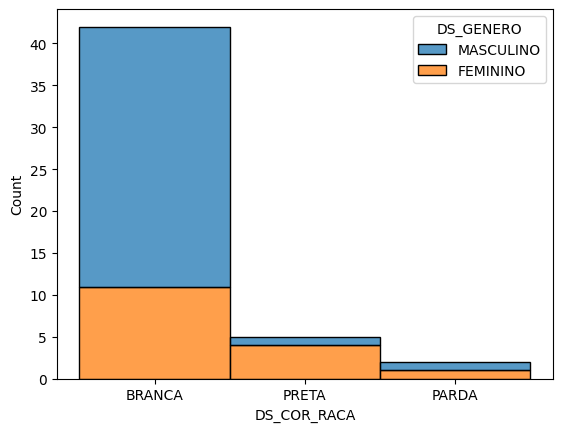

In [102]:
sns.histplot(
    data=est_df,
    hue='DS_GENERO',
    x='DS_COR_RACA',
    multiple='stack',
)